# Ch. 10 - Monte Carlo Methods (Part 2)

In the previous notebook, we looked at random number generators and how these can be used to simulate random processes such as radioactive decay and (Rutherford) scattering of a charged particle from a nucleus. These are two examples of a Monte Carlo simulation, the simulation of a random (or apparently random) process in nature using a computer. Often the goal is to determine some average state of a system of particles that describe it. We might want to find the average temperature or energy of a system of many particles for instance. We continue with some important methods to perform Monte Carlo simulations in this Notebook. 

In the last notebook, we considered Importance Sampling. This approach was to select sample points from a function that might have pathologies (discontinuities, rapid variations, or extend over an infinite range). For instance, you can't choose random, uniformally distributed points over an infinite range. Consider a Gaussian function decreasing asymptotically to zero at infinity. We can choose sample points for our purpose, preferentially from the regions that are most significant - where the values are not close to zero. Consider the average position of a one particle out of many with a Gaussian distribution along a line. It's probably close to the origin but if we choose random points distributed *uniformly* from 0 to infinity, and average their positions, it is pretty unlikely that any will actually be close to the origin where the probability is significant. In this example the average value
of the position 
$$
\left< x \right> = \frac{1}{N} \sum_{i=0}^{N} x_{i}P(x_{i})
$$
is rather close to the origin, somewhere in the "peak" of the Gaussian. If we were to sample random numbers uniformly distributed points with uniform probabilities (weights) in the range 0 to infinity the will likely all, or at least mostly be far from the Gaussian "peak." The trick is importance sample. Choosing sampling points so that those the rarer ones are weighted more heavily. 

Let us extend this to an entire system of particles - a statistical ensemble of N particles. Each has some energy $E_{i}$. The probability that a particle has energy, $E_{i}$, is given by the Boltzmann factor
$$
P(E_{i}) = \frac{e^{-\beta E_{i}}}{Z}, \qquad \text{with} \qquad Z = \sum_{i} e^{-\beta E_{i}}
$$
The average (expectation) value of some quantity of the system (temperature, energy, etc.) can be computed from
$$
\left< X \right> = \sum_{i} X_{i} P(E_{i})
$$
The sum here is over the quantity (X_{i}=E_{i}, v_{i}, etc.) for each particle, weighted by it's probability. Often we are dealing with enormous ($>10^{23}$) particles. We must do the sum with *importance sampling*. While the derivation (mainly on p. 478) is in some detail, it leads to a sum over all the weights we choose, $\sum_{i} = w_{i}$, which is a sum over all possible states (all i of them). A convenient choice of weights is $w_{i}=P(E_{i})$ simply because
$$
\sum_{i} P(E_{i}) = 1
$$
by definition. The total probability of all possible states must add up to 1. The system has to be in one of the states!
We know have
$$
\left< X \right> = \frac{1}{N} \sum_{k=1}^{N} X_{k}
$$
All we have to do is pick the N states according to their Boltzmann probabilities (rather than uniformly), compute the value X in each of these states of the system and divide by N. This estimate of $\left< X \right> $ will get better the more states we sample. So we can just run for longer to get a more accurate estimate.

The text goes through the derivation in more detail. It will probably require working through the math to get a deeper understanding of the details behind this approach.

### The Markov Chain Method

The last difficulty is to compute the Boltzmann probabilities which we need to choose our k sample points in the last equation. These are given by
$$
P(E_{i}) = \frac{e^{-\beta E_{i}}}{Z}
$$
where Z is the partition function, which is a sum over **all** possible states. That is what we wanted to avoid! 

The Markov method is a way to get around this. Z will cancel out, as follows. The probability for a transition from current state i to new state j (due to a single, small change in the system) is given by $T_{ij} = P(E_{j}) = e^{-\beta E_{j}}/Z$. The probability $T_{ji}$ of moving from the new state back to state i is almost the same, just replace $E_{j}$ with $E_{i}$. It is possible to choose these probabilities so that
$$
\frac{T_{ij}}{T_{ji}} = \frac{P(E_{j})}{P(E_{i})} = \frac{e^{-\beta E_{j}}/Z}{e^{-\beta E_{i}}/Z} = e^{-\beta (E_{j}-E_{i})}
$$
Changing from state i to state j (or back) requires a tiny, reversible steps (or a series of tiny, reversible steps). 

The most common method to determine this is called the *Metropolis algorithm*. It will randomly make a *tiny, reversible steps* until our *system* fluctuates slightly around an equilibrium state. 

This is a good point for some trivia in case you are ever on Jeopardy. Rather than the city in Superman, it is actually named after its co-inventer Nicholas Metropolis. There is a more general formulation by Keith Hastings, sometimes called the Metropolis-Hastings algorithm. According to the notes from the Comp Physics class I took, Edward Teller was also a co-auther on one of these papers.

Let's look at Example 5.2 to understand what how this is implemented in practice. This example uses a system consisting of $N=1000$ non-interacting, ideal, quantum mechanical particles in a 3D box. They have an energy 
$$
E \left( n_{x},n_{y},n_{z} \right) = \frac{\pi^{2}\hbar^{2}}{2mL^{2}}\left( n_{x}^{2} + n_{y}^{2} + n_{z}^{2} \right)
$$
each of the values $n_{x}$, $n_{y}$, and $n_{z}$ can each range from 1 to $\infty$ for each of the particles. We have no idea how the particles are distributed however. We do not know their true initial values. We expect the system will reach an equilibrium state where the particles have some average energy because there is a specified system temperature T. (therefore the system has a constant, average total energy.) The total energy is given by adding up these
$$
E_{total} = \sum_{i=1}^{N} E \left( n_{x}^{(i)}, n_{y}^{(i)}, n_{z}^{(i)} \right)
$$
were the superscript (i) labels the $i^{th}$ particle. For simplicity we will set $m=\hbar=L=1$ and specify the temperature of this system using $k_{B}T = 10$. 

To simulate this system using a Markov chain, all we need to start with is *any* set of initial values for the particles. We might as well do something simple like set the energy using $n_{x}=n_{y}=n_{z}=1$ for **all** particles. We will *change* this configuration in small, random steps and compute the entire energy of the system for the new system each time. Sometimes the configuration (energy) may not change - there is a probability on each step that the system will actually not change (or rather move from state i to state i with probability T_{ii}).

In practice, a small (tiny, reversible) change means randomly picking a single particle to change, randomly changing one of its three quantum numbers to change by $\pm 1$ ($n_{x}$, $n_{y}$, or $n_{z}$ but not more than one of them). Each step the total energy is computed again. The system will find configurations that fluctuate around the equilibrium total energy appropriate for the choice of $k_{B}T=10.0$. (Note: If we choose the temperature to be zero, this process would find the global minimum or ground state energy, starting from some initial state we can specify. This forms the basis of a technique called *simulated annealing*, discussed later, to find global minima of functions.)

The code from Example 10.3 is implemented in the following cell. You should see that the system, with random changes converges to some equilibrium range of configurations. It takes on values that vary randomly about a steady, constant equilibrium state.

The textbook mentions that Metropolis methods are extremely applicable to systems studied in Statistical Mechanics (quantum or classical) but they also apply in some way to almost every other area of physics. It is interesting to see how this technique is actually implemented so let's look at the example from the text for an ideal, non-interacting quantum gas in a 3D box.

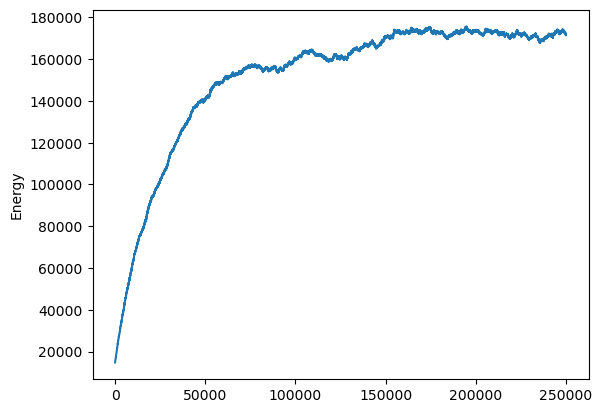

In [4]:
from random import random,randrange
from math import exp,pi
from numpy import ones
from pylab import plot,ylabel,show

T = 100
N = 1000
steps = 250000

# Create a 2D array to store the quantum numbers
n = ones([N,3],int)

# Main loop
eplot = []
E = 3*N*pi*pi/2

for k in range(steps):
    
    # Choose the particle and the move
    i = randrange(N)
    j = randrange(3)
    if random()<0.5:
        dn = 1
        dE = (2*n[i,j]+1)*pi*pi/2
    else:
        dn = -1
        dE = (-2*n[i,j]+1)*pi*pi/2
    
    # Decide whether to accept the move
    if n[i,j]>1 or dn==1:
        if random()<exp(-dE/T):
            n[i,j] += dn
            E += dE
            
    eplot.append(E)
    
# Make the graph
plot(eplot)
ylabel("Energy")
show()

### Exercise
Increase the value of the temperature T. What happens to the equilibrium energy? Does it increase or decrease?
### Answer: The equilibrium energy increases with an increase in T.

__________________________
### Exercise
Increase the number of steps by an order of magnitude or more? Does the simulation continue to stay around the equilibrium value?
### Answer: The simulation does continue to stay around the equilibrium value when the step size was increased by a factor of 10.

__________________________

This process can work for other systems. The Ising model is a simple but extremely useful model for many types of systems. It can simulate ferromagnetic materials. Ising models have an interaction energy (Hamiltonian) between pairs of atoms or molecules. Typically each atom interacts with its neighbors. In modified versions, atoms may interact with more distant atoms simulating longer range interactions. In this way, you can alter properties and behavior of the material you are simulating. Such models may be used to study phase transitions in materials.

Having seen an example, here is a list describing the steps of a generic Markov chain in Monte Carlo simulations (same as the list on page 483):
1. Choose a random starting state.
2. Choose a move uniformly at random from an allowed set of moves, such as changing a single molecule to a new state.
3. Calculate the value of the acceptance probability $P_{a}$ given in Eq. (10.60) which is 
$$
P_{a} = 
  \begin{align}
    \begin{cases}
    1  & \text{if} E_{j} \leq E_{i}, \\
    e^{-\beta (E_{j} - E_{i})} & \text{if} E_{j} > E_{i}.
    \end{cases}
  \end{align}
$$
4. With probability $P_{a}$ accept the move, meaning the state of the system changes to the new state; otherwise reject it, meaning the system stays in its current state for one more step of the calculation.
5. Measure the value of the quantity of interest X in the current state and add it to a running sum of such measurements.
6. Repeat from step 2.


### 10.4 - Simulated Annealing

The type of Monte Carlo method just outlined has been adapted in recent years as a way to locate *global* minima of functions. (Not just thermodynamic functions but any function! The algorithm doesn't care what it represents.) You can be confident that you find a global minimum, rather than a local minimum. With other approaches to find minima, discussed back in Ch. 6, it is hard to determine if you found the true global minimum or not.

The trick is to replace the energy, $E(n_{x},n_{y},n_{z})$ in the example above, with a general function $f(x,y,z,...)$ that we wish to find a *global minimum* for). E becomes f, and the $n_{i}$s become x, y, z and so on. We set any initial state (x,y,z,...) and let the process evolve randomly, in small steps, until the equilibrium position is reached. In the example we looked at above, we set $T=10.0$. But if we want the *ground state* in the case of E, or *global minimum* in the case of f, we can set $T=0$. The system will evolve to this equilibrium position. You will find the values of $n_{i}$s at the minimum energy configuration E, or you will find the values of (x,y,z,...) that correspond to the global minimum of f, respectively.

The reason that *simulated annealing* works is that the path to equilibrium is required be slow (the "temperature" must approach zero slowly). In other methods of minimizing functions the steps move to a minimum rapidly and get stuck at the nearest one (which may only be a local minimum). Moving in any "direction" or changing any parameter from that point will result in an increase in the function being minimized. If it is a local, rather than global, maximum you get the wrong minimum. If you allow the system to "cool" slowly it can wander out of those local minima without getting stuck. This is related to why the method is called *simulated annealing*. Here's why the method has this name.

Molten glass or metal is *annealed* or cooled slowly on purpose. Glassmakers and metallurgists know that if the material is cooled too quickly, defects can get frozen into the glass or metal. The hot material has atoms moving rather rapidly. They are in a disordered (higher energy) state. If cooled rapidly, the disorder gets frozen in. The material is frozen in a local minimum of the energy, rather than a more ordered, "global" minimum energy state. The same thing happens if we simulate a system and let it approach equilibrium (as in the example coded above) at temperature $T=0$. We can use the same process as above but make sure the cooling or equilibration happens slow enough.

On page 492 and 493, the textbook briefly discusses the two important considerations in this method: 
1. how to choose an initial temperature to cool from, and 
2. how fast one should allow the system to cool. 
As usual the choices are a compromise between getting accurate enough estimates of the global minimum and a reasonable speed of performing the calculation.

There is more discussion in the text plus a nice *Traveling Salesman* example, with code on p. 493, if you are interested in learning more about this.

One final, but very important, topic...

## Random Walks 

Random walks are an example of a Markov process. They have many applications in a diverse range of areas. The website https://www.geeksforgeeks.org/random-walk-implementation-python/
lists a few applications:
1. In computer networks, random walks can model the number of transmission packets buffered at a server.
2. In population genetics, a random walk describes the statistical properties of genetic drift.
3. In image segmentation, random walks are used to determine the labels (i.e., “object” or “background”) to associate with each pixel.
4. In brain research, random walks and reinforced random walks are used to model cascades of neuron firing in the brain.
5. Random walks have also been used to sample massive online graphs such as online social networks.

There are obviously many applications in computational biophysics and medical physics. A first example, in the next cell, comes from the geeksforgeeks.org website above for a 2D random walk. If interested you can read more on that website (or many others).

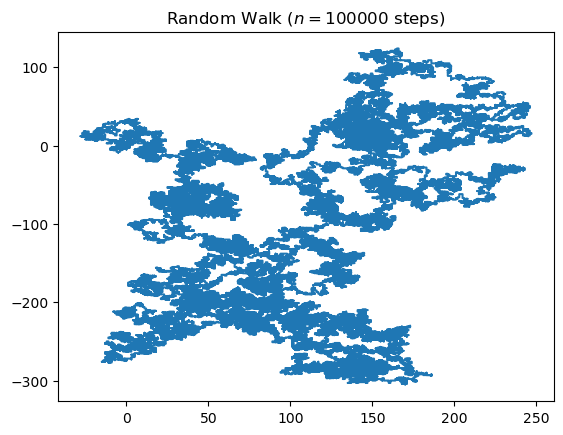

In [5]:
# Python code for 2D random walk.
import numpy
import pylab
import random
 
# defining the number of steps
n = 100000
 
#creating two array for containing x and y coordinate
#of size equals to the number of size and filled up with 0's
x = numpy.zeros(n)
y = numpy.zeros(n)
 
# filling the coordinates with random variables
for i in range(1, n):
    val = random.randint(1, 4)
    if val == 1:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1
     
 
# plotting stuff:
pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
pylab.plot(x, y)
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()

A second example, with an animated visualization using vpython is shown in the next cell. This code simulates Brownian motion. It is the solution of the textbook Exercise 10.3. I added a second, red sphere also undergoing Brownian motion (though it is not independent since I'm using the same i and j value for both spheres).

In [ ]:
from math import log, sqrt
from vpython import sphere,box,color,rate,vector,canvas, cylinder
from random import randrange

L = 1001
N = 1000000
framerate = 100
d=22

canvas()

# Draw the walls of the box and the initial
# position of the particle
box(pos=vector(-L/2,0,0),length=1,height=L,width=2, \
   color=color.green)
box(pos=vector(L/2,0,0),length=1,height=L,width=2, \
   color=color.green)
box(pos=vector(0,-L/2,0),length=L,height=1,width=2, \
              color=color.green)
box(pos=vector(0,L/2,0),length=L,height=1,width=2, \
   color=color.green)
s = sphere(pos=vector(0,0,0),radius=10,color=color.white)
s2 = sphere(pos=vector(20,30,10),radius=10,color=color.red)

# Main loop
i = j = 0
for k in range(N):
    dir = randrange(4)
    if dir==0:
        if i<L/2:
            i += 1
    elif dir==1:
        if i>-L/2:
            i -= 1
    elif dir==2:
        if j<L/2:
            j += 1
    else:
        if j>-L/2:
            j -= 1
        
    rate(framerate)
    s.pos = vector(i,j,0)
    s2.pos = vector(j+j+i,j+i+i,0)
    
    #Distance between particles:
    distv = s.pos-s2.pos
    dist = sqrt(distv.x**2+distv.y**2)
    if dist<20:
        s.color = color.blue
        s2.color = color.black
        
#canvas()

<IPython.core.display.Javascript object>

Let's consider what is happening here. Each step in our Random Walk simulation each particle moves in a random direction. This could be a particle moving in a fluid for instance. 

Let me hypothesize an application as an example. What if each "particle" represents a cell moving in a fluid (white) or a drug molecule (red) in that fluid? One could imagine extending this. What if you had many drug molecules mixed with many cells, some of which have receptors the drug is targeting? The drug won't interact with just any cell but you could check the proximity of the drug molecules to the nearby cells (compute the distance after each step, r=sqrt(x*x+y*y)). If a drug and target cell are close enough together, they may interact. You could simulate the rate of interaction and perhaps the effectiveness of the medication per treatment. Just one idea. 

### Exercise
Add a line to compute the distance between the two spheres s.pos and s2.pos. (You can access the components using s.pos.x and s2.pos.x or s.pos.y and s2.pos.y, for example.) If the distance is less than 20, perhaps set the color to blue for the white particle (s.color=color.blue) and the color of the red particle to black (s2.color=color.black) so the red particle disappears. This could simulate a drug (red) interacting with a target cell (white) and after the drug-cell interaction there is only a modified, treated cell (blue). If you want to see this happen for sure start them at a distance of 22 to 25 perhaps.

### Answer (Modify code in the cell above. Indicate the new lines with a comment.):
New lines:

    distv = s.pos-s2.pos
    dist = sqrt(distv.x**2+distv.y**2)
    if dist<20:
        s.color = color.blue
        s2.color = color.black


_________________________________


Another common application is a photon moving from the core of the Sun. It turns out it takes a photon on the order of 100,000 years to reach the surface. It spends this time in basically a random walk, scattering in random directions. Due to the high density, the photon can only move a tiny distance before being scattered again in an (almost) random direction. This isn't quite a completely random walk since there is some very, very slightly higher probability it will move toward the surface, in the direction of lower density. 

Anyway, Random Walks are important in many areas of computational physics. I hope that seeing a couple examples with some discussion demonstrates how they work and provides an idea of how they may be applied! 